# MNIST
![Image of mnist](https://cdn-images-1.medium.com/max/1600/1*_R6Qhi8dbLe8jvVKlGdHYw.png)

## Overview
1. Introduction
    - What is MNIST?
    - Files Involved
2. Reading from compressed files
3. Reading the label files
4. Reading the image files
5. Exporting the labels and images
6. References

## Introduction
This jupyter notebook will explain how to read the MNIST dataset efficiently into memory in Python.

### What is MNIST?
The **MNIST dataset [1]** is a dataset that contains a training set of 60,000 examples, and a test set of 10,000 examples, of hand written digits. It stands for the Mixed National Institute of Standards and Technology. It is used for training image processing systems. 

### Files involved
There are four files that are available on the official MNIST website:
1. Training set images
2. Training set labels
3. Test set images
4. Test set labels

Files 1 and 2 are the training set files; we will use these files to train our neural network later on.

Files 3 and 4 are the test set files, these files will be used on our trained neural network to try to predict the handwritten digits.

Files 1 and 3 contain the image files for the digits, and files 2 and 4 contain the labels for the digits.

The files are compressed with the .gz extension. GZ files are files that have been created using the gzip compression utility. This was created to replace and improve the Compress in UNIX.

## Reading from the compressed files

The gz files can be manually extracted using tools like 7zip and peazip, but for ease of access, we can use python libraries that will help with this. We will use a package called **gzip [2]** to help with this.

The following shows the usage of gzip to read in all the files:

In [31]:
# Adapted from: https://docs.python.org/3/library/gzip.html

import gzip

# extract and read the respective training and test datasets
with gzip.open('data/train-images-idx3-ubyte.gz', 'rb') as f:
    train_images = f.read()
    
with gzip.open('data/train-labels-idx1-ubyte.gz', 'rb') as f:
    train_labels = f.read()
    
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    test_images = f.read()
    
with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    test_labels = f.read()
    

    


## Reading the label files

Now that we've opened up the gz files, let's take a look at what they contain.

This is what the training set labels file contains, according to the MNIST documentation:

```
|[offset] |[type]          |[value]          |[description]            |

|0000     |32 bit integer  |0x00000801(2049) |magic number (MSB first) |
|0004     |32 bit integer  |60000            |number of items          |
|0008     |unsigned byte   |??               |label                    |
|0009     |unsigned byte   |??               |label                    |
|........                                                              |  
|xxxx     |unsigned byte   ??                |label                    |
```
The labels values are 0 to 9.

The integers in the files are stored in the MSB first (big endian) format. This basically means that the most significant byte (the big end) of the data is places at the byte with the lowest address (it comes first). Good explanation on the **chortle.ccsu website [3]**.

The first 4 bytes indicate that the "magic number", which tells the user what file he's currently reading in. (2049 are the label sets, 2051 are the image sets).

Let's look at the first 4 bytes of the first training set (wrong method):


In [5]:
train_labels[0:4] #prints bytes from position 0-4 in dataset

b'\x00\x00\x08\x01'

As we can see, this is the wrong method because the bytes are printed in machine readable code. We have to get the int from the bytes using this method:

In [7]:
int.from_bytes(train_labels[0:4] , byteorder='big') #converts bytes from position 0-4 into int

2049

As predicted, the integer that is returned to us is 2049, indicating that it is a label set.

The next 4 bytes will tell the user if its a training set or test set by the number of files that it contains:

In [9]:
int.from_bytes(train_labels[4:8], byteorder='big') #converts bytes from position 4-8 into int


60000

As we can see the integer 60000 represents the 60000 labels that is contained in this training set.

The next 60000 bytes contain the labels, which are in order and match up with the training images set. The following are the first 5 labels in the dataset.

In [23]:
a = int.from_bytes(train_labels[8:9], byteorder='big') #get first label
b = int.from_bytes(train_labels[9:10], byteorder='big') #get second label
c = int.from_bytes(train_labels[10:11], byteorder='big') #get third label
d = int.from_bytes(train_labels[11:12], byteorder='big') #get fourth label
e = int.from_bytes(train_labels[12:13], byteorder='big') #get fifth label
print (a," ",b," ",c," ",d," ",e); 


5   0   4   1   9


These are the first 5 digits contained in both the training labels and images set. 

The labels test set uses the same format and structure, but with 10000 labels instead of 60000.


## Reading the image files
The image sets has a slightly different structure, as documented in their website: 
```
|[offset] |[type]          |[value]          |[description]            |

|0000     |32 bit integer  |0x00000803(2051) |magic number (MSB first) |
|0004     |32 bit integer  |60000            |number of images         |
|0008     |32 bit integer  |28               |number of rows           |
|0012     |32 bit integer  |28               |number of column         |
|0016     |unsigned byte   |??               |pixel                    |
|0017     |unsigned byte   |??               |pixel                    |
|........                                                              |  
|xxxx     |unsigned byte   ??                |pixel                    |
```

As we can see from the table above, the structure of the dataset is similar to the labels data set. From byte 16 onwards, the byte stores a pixel value. The images in this dataset are 28 x 28, which means that every 784 pixels will make up one image.

The following is the code to read the first 5 images. Note that the array has to be reshaped to28 x 28:

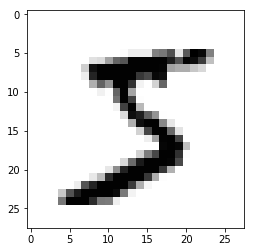

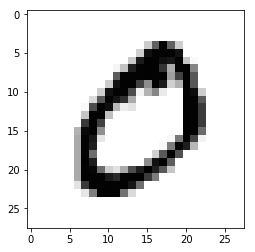

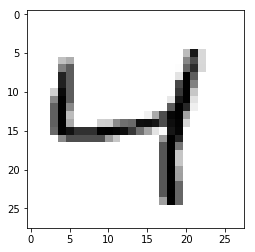

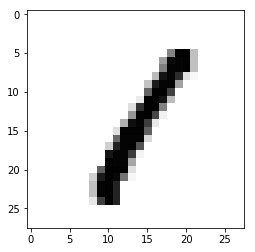

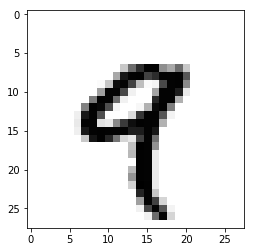

In [46]:
import numpy as np
import matplotlib.pyplot as plt

imageA = ~np.array(list(train_images[16:800])).reshape(28,28).astype(np.uint8) #get first image
imageB = ~np.array(list(train_images[800:1584])).reshape(28,28).astype(np.uint8) #get second image
imageC = ~np.array(list(train_images[1584:2368])).reshape(28,28).astype(np.uint8) #get third image
imageD = ~np.array(list(train_images[2368:3152])).reshape(28,28).astype(np.uint8) #get fourth image
imageE = ~np.array(list(train_images[3152:3936])).reshape(28,28).astype(np.uint8) #get fifth image
%matplotlib inline


plt.imshow(imageA, cmap='gray') #display first image
plt.figure()
plt.imshow(imageB, cmap='gray') #display second image
plt.figure()
plt.imshow(imageC, cmap='gray') #display third image
plt.figure()
plt.imshow(imageD, cmap='gray') #display fourth image
plt.figure()
plt.imshow(imageE, cmap='gray') #display fifth image

The 5 images displayed are the same as the first 5 labels in the labels dataset. 

The ~ symbol is put before the function is to change all the 255 pixels to 0, and vice versa. This is because the pixel values used by MNIST, 0 means background (white), 255 means foreground (black). This is the reverse of the more common 0 means foreground, and 255 means black. Inverting it will just make it revert to the original colour as MNIST intended.



## Exporting Images and Labels

Now that we know what these dataset contain, we can export the images and labels. 

We will first dissect the images and labels dataset, by getting each label and image and putting them in an array in the right order:

In [72]:
train_labels_array = [] #instantiate array for train labels

for x in range(8, 60008): #iterate to EOF
    y= x+1
    label = int.from_bytes(train_labels[x:y], byteorder='big')
    train_labels_array.append(label)

train_images_array = [] #instantiate array for train images

for x in range(16, 47040000,784): #iterate to EOF
    y= x+784
    image = ~np.array(list(train_images[x:y])).reshape(28,28).astype(np.uint8)
    train_images_array.append(image)

test_labels_array = [] #instantiate array for test labels

for x in range(8, 10008): #iterate to EOF
    y= x+1
    label = int.from_bytes(test_labels[x:y], byteorder='big')
    test_labels_array.append(label)

test_images_array = [] #instantiate array for test images

for x in range(16, 7840016,784): #iterate to EOF
    y= x+784
    image = ~np.array(list(test_images[x:y])).reshape(28,28).astype(np.uint8)
    test_images_array.append(image)


Next, we will create a train and test directory (if it hasnt been created) in the data directory and output the images along with its labels as its name. The code for converting a list of pixels to an image file was taken from **stackoverflow [4]**.

In [71]:
from PIL import Image
import os



# creates this directory "train" if the user hasnt created it
filename = 'data/train/label'
if not os.path.exists(os.path.dirname(filename)):
    try:
        os.makedirs(os.path.dirname(filename))
    except OSError as exc: # Guard against race condition
        if exc.errno != errno.EEXIST:
            raise
            
filename = 'data/test/label'
if not os.path.exists(os.path.dirname(filename)):
    try:
        os.makedirs(os.path.dirname(filename))
    except OSError as exc: # Guard against race condition
        if exc.errno != errno.EEXIST:
            raise
            
            
            

for x in range(0, 60000): #iterate to EOF
    new_image = Image.fromarray(train_images_array[x]) #create the image file
    new_image.save('data/train/train_%d_%d.png' % (x + 1,train_labels_array[x])) #save the image file
    
for x in range(0, 10000): #iterate to EOF
    new_image = Image.fromarray(test_images_array[x]) #create the image file
    new_image.save('data/test/test_%d_%d.png' % (x + 1,test_labels_array[x])) #save the image file
    

The images has been exported to the data/train and data/test folders.

## References

1. MNIST Database Website http://yann.lecun.com/exdb/mnist/
2. Gzip tutorial and how to implement it https://docs.python.org/3/library/gzip.html
3. Good explanation of Big / Little Endian - https://chortle.ccsu.edu/AssemblyTutorial/Chapter-15/ass15_3.html
4. Example on outputting image from list of pixels - https://stackoverflow.com/questions/46923244/how-to-create-image-from-a-list-of-pixel-values-in-python3
5. Code snippets and examples taken from Dr Ian McLoughlin's git hub - https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/mnist.ipynb